## Task 6: Model Tuning 
- Use parameters like: 
    1. max_depth 
    2. min_samples_split 
- Show how performance changes. 
- Plot training vs testing accuracy to visualize overfitting.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset("titanic")
df = df.dropna(subset=["age", "embarked", "sex", "fare", "survived"])

In [3]:
# Encode categorical variables
df["sex"] = df["sex"].map({"male": 0, "female": 1})
df["embarked"] = df["embarked"].map({"S": 0, "C": 1, "Q": 2})

In [4]:
# Select features and target
X = df[["pclass", "sex", "age", "fare", "embarked"]]
y = df["survived"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#Tune max_depth and plot training vs testing accuracy
train_acc = []
test_acc = []
depth_range = range(1, 15)

for depth in depth_range:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc.append(accuracy_score(y_test, model.predict(X_test)))


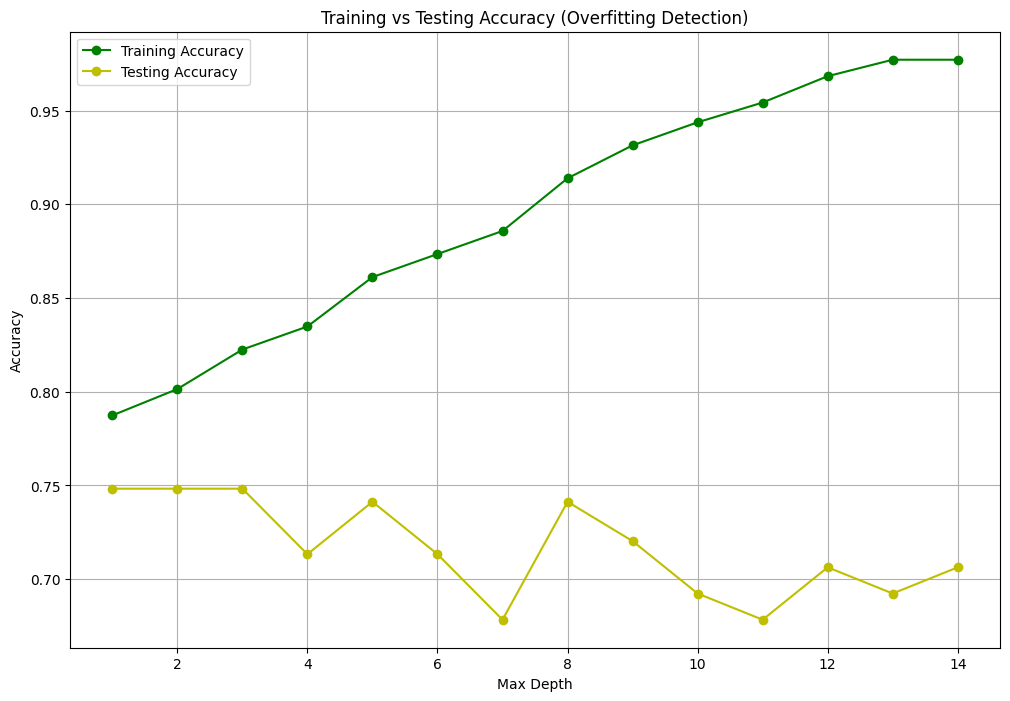

In [11]:
plt.figure(figsize=(12, 8))
plt.plot(depth_range, train_acc,'g', label='Training Accuracy', marker='o')
plt.plot(depth_range, test_acc, 'y',label='Testing Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy (Overfitting Detection)')
plt.legend()
plt.grid(True)
plt.show()